# Portfolio Optimization

“Modern Portfolio Theory (MPT), a hypothesis put forth by Harry Markowitz in his paper “Portfolio Selection,” (published in 1952 by the Journal of Finance) is an investment theory based on the idea that risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. It is one of the most important and influential economic theories dealing with finance and investment.

## Monte Carlo Simulation for Optimization Search


We could randomly try to find the optimal portfolio balance using Monte Carlo simulation

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [42]:
tickers = ['INFY.NS','TCS.NS','ITC.NS','RELIANCE.NS','MRF.NS','HINDUNILVR.NS','BATAINDIA.NS','ALKEM.NS']
start = '2016-4-6'
end = '2021-4-6'

stocks = yf.download(tickers,start,end)
stocks = stocks['Close']

[*********************100%***********************]  8 of 8 completed


In [43]:
stocks

,ALKEM.NS,BATAINDIA.NS,HINDUNILVR.NS,INFY.NS,ITC.NS,MRF.NS,RELIANCE.NS,TCS.NS
Date,,,,,,,,
2016-04-06,1313.400024,514.349976,871.700012,600.349976,217.266663,36174.648438,512.021545,1240.949951
2016-04-07,1337.800049,523.049988,860.000000,590.750000,212.966660,35791.050781,513.755127,1235.400024
2016-04-08,1340.900024,528.500000,850.400024,582.875000,214.133331,35468.250000,513.309326,1216.025024
2016-04-11,1329.550049,535.250000,864.299988,591.950012,218.166672,35800.699219,515.265808,1253.324951
2016-04-12,1333.900024,534.849976,872.500000,591.099976,214.933334,36269.750000,518.782471,1259.074951
...,...,...,...,...,...,...,...,...
2021-03-26,2650.050049,1411.949951,2317.899902,1336.199951,210.899994,82009.453125,1994.650024,3066.800049
2021-03-30,2739.649902,1404.250000,2398.750000,1385.300049,214.550003,83185.296875,2029.300049,3158.550049
2021-03-31,2769.800049,1406.199951,2431.500000,1368.050049,218.500000,82259.453125,2003.099976,3177.850098


In [44]:
mean_daily_ret = stocks.pct_change().mean()
mean_daily_ret

ALKEM.NS         0.000735
BATAINDIA.NS     0.000982
HINDUNILVR.NS    0.000922
INFY.NS          0.000856
ITC.NS           0.000134
MRF.NS           0.000818
RELIANCE.NS      0.001294
TCS.NS           0.000915
dtype: float64

In [45]:
stocks.pct_change(1).corr()

,ALKEM.NS,BATAINDIA.NS,HINDUNILVR.NS,INFY.NS,ITC.NS,MRF.NS,RELIANCE.NS,TCS.NS
ALKEM.NS,1.000000,0.107686,0.099261,0.033773,0.099336,0.151544,0.110885,0.031690
BATAINDIA.NS,0.107686,1.000000,0.325100,0.224022,0.245024,0.343272,0.347695,0.236560
HINDUNILVR.NS,0.099261,0.325100,1.000000,0.251581,0.275890,0.250590,0.306316,0.252244
INFY.NS,0.033773,0.224022,0.251581,1.000000,0.158142,0.187756,0.240959,0.547226
ITC.NS,0.099336,0.245024,0.275890,0.158142,1.000000,0.234157,0.215470,0.172475
MRF.NS,0.151544,0.343272,0.250590,0.187756,0.234157,1.000000,0.336025,0.142076
RELIANCE.NS,0.110885,0.347695,0.306316,0.240959,0.215470,0.336025,1.000000,0.257314
TCS.NS,0.031690,0.236560,0.252244,0.547226,0.172475,0.142076,0.257314,1.000000


# Simulating Thousands of Possible Allocations

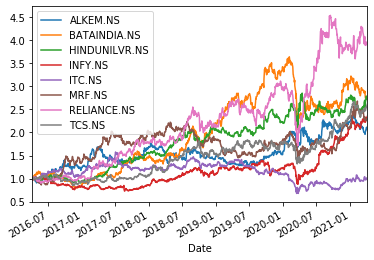

In [46]:
#Normalisation of prices
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [47]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,ALKEM.NS,BATAINDIA.NS,HINDUNILVR.NS,INFY.NS,ITC.NS,MRF.NS,RELIANCE.NS,TCS.NS
Date,,,,,,,,
2016-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-07,0.018578,0.016915,-0.013422,-0.015991,-0.019791,-0.010604,0.003386,-0.004472
2016-04-08,0.002317,0.010420,-0.011163,-0.013331,0.005478,-0.009019,-0.000868,-0.015683
2016-04-11,-0.008464,0.012772,0.016345,0.015569,0.018836,0.009373,0.003812,0.030674
2016-04-12,0.003272,-0.000747,0.009487,-0.001436,-0.014820,0.013102,0.006825,0.004588


In [48]:
#Calculating Log returns
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,ALKEM.NS,BATAINDIA.NS,HINDUNILVR.NS,INFY.NS,ITC.NS,MRF.NS,RELIANCE.NS,TCS.NS
Date,,,,,,,,
2016-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-07,0.018407,0.016773,-0.013513,-0.016120,-0.019990,-0.010661,0.003380,-0.004482
2016-04-08,0.002315,0.010366,-0.011226,-0.013420,0.005463,-0.009060,-0.000868,-0.015807
2016-04-11,-0.008500,0.012691,0.016213,0.015449,0.018660,0.009329,0.003804,0.030213
2016-04-12,0.003266,-0.000748,0.009443,-0.001437,-0.014931,0.013017,0.006802,0.004577


In [49]:
log_ret.mean() * 252

ALKEM.NS         0.148206
BATAINDIA.NS     0.204644
HINDUNILVR.NS    0.205195
INFY.NS          0.174917
ITC.NS          -0.004497
MRF.NS           0.166464
RELIANCE.NS      0.278394
TCS.NS           0.196551
dtype: float64

In [50]:
# Compute pairwise covariance of columns
log_ret.cov()

,ALKEM.NS,BATAINDIA.NS,HINDUNILVR.NS,INFY.NS,ITC.NS,MRF.NS,RELIANCE.NS,TCS.NS
ALKEM.NS,0.000292,0.000034,0.000025,0.000011,0.000031,0.000046,0.000037,0.000010
BATAINDIA.NS,0.000034,0.000339,0.000088,0.000076,0.000080,0.000114,0.000126,0.000072
HINDUNILVR.NS,0.000025,0.000088,0.000214,0.000066,0.000071,0.000066,0.000086,0.000061
INFY.NS,0.000011,0.000076,0.000066,0.000325,0.000052,0.000062,0.000085,0.000161
ITC.NS,0.000031,0.000080,0.000071,0.000052,0.000305,0.000074,0.000076,0.000051
MRF.NS,0.000046,0.000114,0.000066,0.000062,0.000074,0.000313,0.000117,0.000043
RELIANCE.NS,0.000037,0.000126,0.000086,0.000085,0.000076,0.000117,0.000376,0.000083
TCS.NS,0.000010,0.000072,0.000061,0.000161,0.000051,0.000043,0.000083,0.000269


In [51]:
log_ret.cov()*252 # multiply by days

,ALKEM.NS,BATAINDIA.NS,HINDUNILVR.NS,INFY.NS,ITC.NS,MRF.NS,RELIANCE.NS,TCS.NS
ALKEM.NS,0.073471,0.008667,0.006245,0.002771,0.007753,0.011604,0.009303,0.002399
BATAINDIA.NS,0.008667,0.085534,0.022229,0.019048,0.020222,0.028766,0.031834,0.018162
HINDUNILVR.NS,0.006245,0.022229,0.053862,0.016521,0.017869,0.016581,0.021792,0.015301
INFY.NS,0.002771,0.019048,0.016521,0.082004,0.013031,0.015580,0.021504,0.040696
ITC.NS,0.007753,0.020222,0.017869,0.013031,0.076964,0.018684,0.019142,0.012852
MRF.NS,0.011604,0.028766,0.016581,0.015580,0.018684,0.078873,0.029473,0.010749
RELIANCE.NS,0.009303,0.031834,0.021792,0.021504,0.019142,0.029473,0.094870,0.020986
TCS.NS,0.002399,0.018162,0.015301,0.040696,0.012852,0.010749,0.020986,0.067793


## Single Run for Some Random Allocation

In [55]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(len(tickers)))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['ALKEM.NS', 'BATAINDIA.NS', 'HINDUNILVR.NS', 'INFY.NS', 'ITC.NS',
       'MRF.NS', 'RELIANCE.NS', 'TCS.NS'],
      dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698 0.83389686
 0.30696622 0.89361308]


Rebalance to sum to 1.0
[0.12888007 0.14242423 0.00710645 0.04280748 0.17102785 0.20811962
 0.07661102 0.22302328]


Expected Portfolio Return
0.15623184613640895


Expected Volatility
0.16184972839028264


Sharpe Ratio
0.9652895169503974


### Now we will run this 15000 times

In [54]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(len(tickers)))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [56]:
GMV_ret = ret_arr[vol_arr.argmin()]
GMV_vol = vol_arr[vol_arr.argmin()]

## Plotting the data and adding Global Minimum Variance

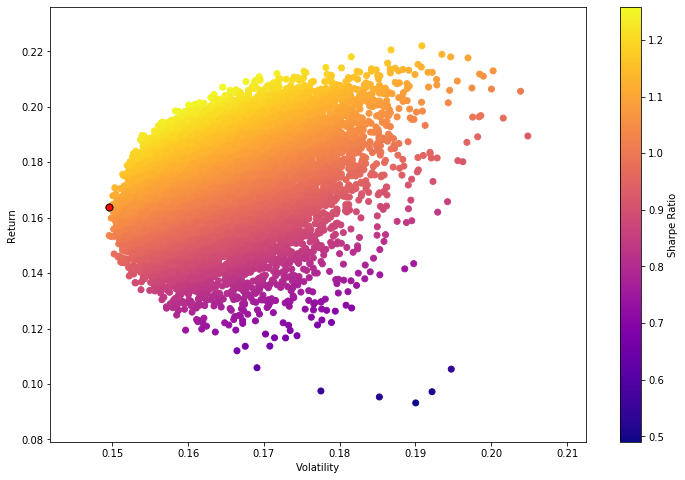

In [58]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(GMV_vol,GMV_ret,c='red',s=50,edgecolors='black')
plt.savefig('Port_optimisation',bbox_inches='tight')